In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

In [6]:
N = 7  # Lengde på polymer
M = 9  # Gitterdimensjon

def init_polymer():
    polymer = np.zeros((N, 2), dtype=np.int32)
    polymer[:, 1] = np.arange(N)
    polymer[:, 0] = M // 2
    return polymer

init_polymer()

array([[4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6]], dtype=int32)

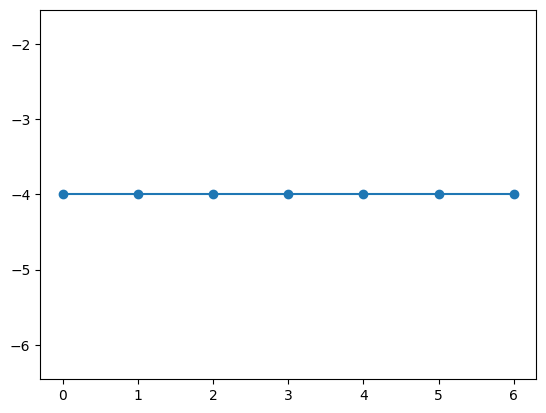

In [10]:
def plot_polymer(polymer):
    plt.plot(polymer[:, 1], -polymer[:, 0], 'o-')
    plt.axis('equal')
    plt.show()

plot_polymer(init_polymer())

In [11]:
from numba import jit, njit
# njit: No-Python mode JIT (Just-In-Time compilation)

CW_ROTATION_MATRIX = ...
CCW_ROTATION_MATRIX = ...

# @njit
def rotate_polymer(polymer: np.ndarray, clockwise: bool) -> np.ndarray:
    """
    polymer: input polymer (or sub-polymer) (N x 2)
    clockwise: direction of rotation
    """
    # Rotate the polymer by 90 degrees in the right direction (matrix multiplication with rotation matrix, follow `clockwise`)
    # Use the rotation matrices defined in constants above
    rotation_matrix = ... # Choose the right rotation matrix
    rotated_polymer: np.ndarray = polymer @ rotation_matrix.T

    return rotated_polymer

# @njit
def twist_polymer(polymer: np.ndarray, monomer_idx: int, clockwise: bool) -> np.ndarray:
    """
    polymer: input polymer (N x 2)
    monomer_idx: index of monomer to twist
    clockwise: direction of twist
    """
    # Check which side is shorter
    shorter_side = ...  # True if shorter side is 0..=monomer_idx-1, False if shorter side is monomer_idx+1..=N-1

    # Slice array to get the smaller side
    shorter_sub_polymer: np.ndarray = ...

    # Translate the shorter sub-polymer to origin at polymer[monomer_idx]
    center = polymer[monomer_idx]
    centered_sub_polymer: np.ndarray = ...

    # Rotate the shorter sub-polymer by 90 degrees in the right direction (matrix multiplication with rotation matrix, follow `clockwise`)
    # Use the rotation matrices defined in constants above
    rotated_sub_polymer: np.ndarray = ...

    # Translate back to get final sub_polymer position
    twisted_sub_polymer: np.ndarray = ...

    # Combine the two sub-polymers into a new polymer
    twisted_polymer: np.ndarray = np.concatenate((..., ...), axis=0)

    return twisted_polymer

# @njit uncomment!
def valid_polymer(polymer: np.ndarray) -> bool:
    # Needs to be fast!
    raise NotImplementedError()

def random_rotations(polymer: np.ndarray, N_s: int) -> np.ndarray:
    """
    polymer: input polymer (N x 2)
    N_s: number of random rotation attempts
    """
    counter = 0  # TODO: Make sure this is correct -- ask TA
    current_polymer = polymer
    clockwise_draws = np.random.rand(N_s) < 0.5
    mon_idx_draws = np.random.randint(1, N - 1, size=N_s)  # Exclusive range [1, N-1), don't include end points
    for i in range(N_s):
        clockwise = clockwise_draws[i]
        mon_idx = mon_idx_draws[i]
        twisted_polymer = twist_polymer(polymer=current_polymer, monomer_idx=mon_idx, clockwise=clockwise)
        if valid_polymer(twisted_polymer):
            counter += 1
            current_polymer = twisted_polymer
    return current_polymer, counter

In [12]:
# @njit
def add_one(x):
    for i in range(x.shape[0]):
        x[i] += 1

@njit
def add_one_numba(x):
    for i in range(x.shape[0]):
        x[i] += 1

arr = np.arange(10_000_000)

In [13]:
%timeit add_one(arr)
%timeit add_one_numba(arr)

2.2 s ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.46 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def calculate_energy(twisted_polymer: np.ndarray, V: np.ndarray) -> float:
    """
    twisted_polymer: input polymer (N x 2)
    V: interaction matrix (N x N)
    """